In [1]:
import numpy as np
import matplotlib.pyplot as plt
from morl_baselines.common.performance_indicators import hypervolume

In [3]:
def read(file, skip_header=1):
    pf = np.genfromtxt(file, delimiter=',', usecols=(0,1), skip_header=skip_header)
    evals = np.genfromtxt(file, delimiter=',', usecols=(3,4), skip_header=skip_header)
    return pf, evals

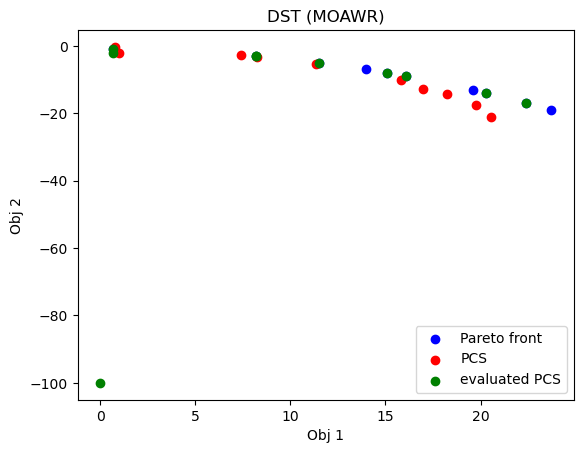

In [10]:
dst_pf = [[.7,-1],[8.2,-3],[11.5,-5],[14,-7],[15.1,-8],[16.1,-9],[19.6,-13],[20.3,-14],[22.4,-17],[23.7,-19]]
pf, evals = read('./points_43.csv')
#pf, evals = read('./pcn_eval_dam_large.csv',0)

x1,y1 = zip(*dst_pf)
x2,y2 = zip(*pf)
x3,y3 = zip(*evals)
plt.scatter(x1, y1, color='blue', label='Pareto front')
plt.scatter(x2, y2, color='red', label='PCS')
plt.scatter(x3, y3, color='green', label='evaluated PCS')

# Add labels and legend
plt.xlabel('Obj 1')
plt.ylabel('Obj 2')
plt.legend()
plt.title('DST (MOAWR)')

# Save the figure
f = 'dst.png'
plt.savefig(f)

In [ ]:
def epsilon_mean_indicator(approx_front, ref_front):
    """
    Compute the additive epsilon mean indicator between two sets of points.
    
    Parameters:
        approx_front (np.ndarray): Approximate Pareto front, shape (n_points, n_objectives)
        ref_front (np.ndarray): Reference Pareto front, shape (m_points, n_objectives)

    Returns:
        float: The epsilon mean indicator value
    """
    epsilons = []

    for ref_point in ref_front:
        min_eps = np.inf
        for approx_point in approx_front:
            eps = np.max(ref_point-approx_point)
            min_eps = min(min_eps, eps)
        epsilons.append(min_eps)
    return np.mean(epsilons)

In [16]:
e = epsilon_mean_indicator(evals,dst_pf)
print(e)

[1.1920928910669204e-08, 1.9073486257070726e-07, 0.0, 1.0, 0.0, 0.0, 1.0, 7.629394538355427e-07, 3.8146972514141453e-07, 1.3000003814697259]
0.33000017285346966


In [9]:
hv = hypervolume(np.array([0, -50]), evals)
print(hv)

981.6000217199326
